# Fitting the Future

What lies ahead in this chapter is you predicting what lies ahead in your data. You'll learn how to use the elegant statsmodels package to fit ARMA, ARIMA and ARMAX models. Then you'll use your models to predict the uncertain future of stock prices!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

p= number of autoregressive lags,
q= number of moving average lags,

## Fitting time series models

The ARMAX model means that we model the time series using other independent variables as well as the time series itself. This is like a combination between an ARMA model and a normal linear regression model.

ARMA(1,1)model: $$y_t = a_1y_{t-1}+m_1\epsilon_{t-1}+\epsilon_{t}$$

ARMAX(1,1)model: $$y_t =x_1z_t + a_1y_{t-1}+m_1\epsilon_{t-1}+\epsilon_{t}$$
$z_t$ is new independent variable, $x_1$ is the coefficient of $z_t$

### Fitting AR and MA models

In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the arma_generate_sample() function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a pandas DataFrame available in your environment called sample. It has two columns of different time series data.

In [4]:
sample = pd.read_csv('sample.csv', index_col=0)
sample.head()

,timeseries_1,timeseries_2
0,-0.183108,-0.183108
1,-0.245540,-0.117365
2,-0.258830,-0.218789
3,-0.279635,-0.169041
4,-0.384736,-0.282374


* Fit an AR(2) model to the 'timeseries_1' column of sample.
* Print a summary of the fitted model.

In [5]:
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(sample['timeseries_1'], order=(2,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood                 148.855
Method:                       css-mle   S.D. of innovations              0.208
Date:                Wed, 02 Feb 2022   AIC                           -289.709
Time:                        08:40:53   BIC                           -270.078
Sample:                             0   HQIC                          -282.248
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0027      0.018     -0.151      0.880      -0.037       0.032
ar.L1.timeseries_1     0.8980      0.030     29.510      0.000       0.838       0.958
ar.L2.timeseries_1  

Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_1' data?
* ar_coefs = [1, -0.9, 0.3]  and  ma_coefs = [1]

* Fit an MA(3) model to the 'timeseries_2' column of sample.

In [6]:
# Instantiate the model
model = ARMA(sample['timeseries_2'], order=(0,3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_2   No. Observations:                 1000
Model:                     ARMA(0, 3)   Log Likelihood                 149.007
Method:                       css-mle   S.D. of innovations              0.208
Date:                Wed, 02 Feb 2022   AIC                           -288.014
Time:                        08:47:35   BIC                           -263.475
Sample:                             0   HQIC                          -278.687
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0018      0.012     -0.159      0.874      -0.024       0.021
ma.L1.timeseries_2     0.1995      0.031      6.352      0.000       0.138       0.261
ma.L2.timeseries_2  

Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_2' data?

* ar_coefs = [1]  and  ma_coefs = [1, 0.2, 0.6, -0.1]

The fitted models had very similar AR and MA coefficient values to the real ones! You know it works!

## Fitting an ARMA model

In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. You can remind yourself what it looks like below.

![Earthquake](earthquakes.png)

The earthquakes dataset is available in your environment as earthquake. The ARMA class is also available in your environment.

In [7]:
earthquake = pd.read_csv('earthquakes.csv', index_col='date', parse_dates=True)
earthquake.drop(['Year'], axis=1, inplace=True)
earthquake.head()

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0


**Instructions**

* Instantiate an ARMA(3,1) model and pass it the earthquakes dataset.
* Fit the model.
* Print the summary of the model fit.

In [8]:
# Instantiate the model
model = ARMA(earthquake['earthquakes_per_year'], order=(3,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Wed, 02 Feb 2022   AIC                            643.345
Time:                          08:56:21   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

### Fitting an ARMAX model

In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional wait_times_hrs. This may be related to an exogenous variable that you measured nurse_count which is the number of nurses on shift at any given time. These can be seen below.

![exogeneous time series](exog_time_series.png)

This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.

The time series data is available in your environment as hospital and has the two columns mentioned above. The ARMA class is also available for you.

In [10]:
hospital = pd.read_csv('hospital.csv', index_col=0, parse_dates=True)
hospital.head()

,wait_times_hrs,nurse_count
2019-03-04 00:00:00,1.747261,1.0
2019-03-04 01:00:00,1.664634,1.0
2019-03-04 02:00:00,1.647047,1.0
2019-03-04 03:00:00,1.619512,1.0
2019-03-04 04:00:00,1.480415,1.0


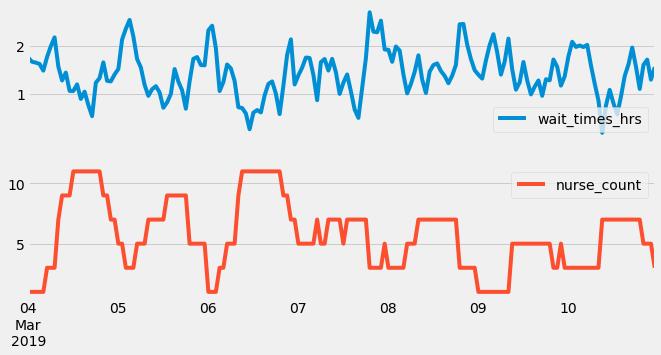

In [12]:
hospital.plot(subplots=True);

**Instructions**

*Instantiate an ARMAX(2,1) model to train on the 'wait_times_hrs' column of hospital using the 'nurse_count' column as an exogenous variable.
* Fit the model.
* Print the summary of the model fit.

In [11]:
# Instantiate the model
model = ARMA(hospital['wait_times_hrs'],order=(2,1),exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                     ARMA(2, 1)   Log Likelihood                 -11.834
Method:                       css-mle   S.D. of innovations              0.259
Date:                Wed, 02 Feb 2022   AIC                             35.668
Time:                        09:03:56   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1000      0.086     24.293      0.000       1.931       2.269
nurse_count             -0.1171      0.013     -9.054      0.000      -0.142      -0.092
ar.L1.wait_t

Look back at the model parameters. What is the relation between the number of nurses on shift and the wait times? If you predicted that tomorrow was going to have long wait times how could you combat this?

## Forecasting

Take an AR(1)model

$$y_t =a_1y_{t-1} + \epsilon_t$$

Predict next value

$$y_t =0.6 * 10 + \epsilon_t$$
$$y_t =6.0 + \epsilon_t$$

Uncertainty on prediction

$5.0<$y_t<7.0$

Take a simple AR(1) model. At any point in the time series we can estimate the next series value. We make this prediction by multiplying the previous value by the lag-one AR coefficient. If the previous value was 10 and coefficient a-one is 0.6, we would estimate the next value as 6. If the shock term had a standard deviation of 1, we would predict our lower and upper uncertainty limits to be 5 and 7.

In the time period we have data for, we can make lots of these predictions in-sample; using the previous series value to estimate the next ones. This is called a one-step-ahead prediction. This allows us to evaluate how good our model is at predicting just one value ahead.

Using SARIMAX class:

p,0,q in SARIMAX is same as p,q in ARMA.

### Generating one-step-ahead predictions

It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as results.

In [14]:
amazon = pd.read_csv('amazon_close.csv', parse_dates=True, index_col='date')
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


In [16]:
amazon.shape

(1259, 1)

In [17]:
amazon=amazon.iloc[::-1] 
amazon.shape

(1259, 1)

In [19]:
amazon

,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35
...,...
2019-02-04,1633.31
2019-02-05,1658.81
2019-02-06,1640.26


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(amazon.loc['2018-01-01':'2019-02-08'], order=(3, 1, 3), seasonal_order=(1, 0, 1, 7),
                enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)
results = model.fit()

C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               close   No. Observations:                  278
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -1338.384
Date:                             Wed, 02 Feb 2022   AIC                           2694.769
Time:                                     09:37:31   BIC                           2727.020
Sample:                                          0   HQIC                          2707.725
                                             - 278                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1070      0.048      2.247      0.025       0.014       0.200
ar.L2          0.0524      0.038      1.365      0.172      -0.023       0.128
ar.L3         -0.8977      0.042    -21.594      0.000      -0.979      -0.816
ma.L1         -0.1210      0.036     -3.387      0.001      -0.191      -0.051
ma.L2         -0.1401      0.031     -4.594      0.000      -0.200      -0.080
ma.L3          0.9678      0.042     23.312      0.000       0.886       1.049
ar.S.L7        0.1783      0.680      0.262      0.793      -1.155       1.511
ma.S.L7       -0.2199      0.671     -0.328      0.743      -1.535       1.096
sigma2      1330.1780    105.735     12.580      0.000    1122.941    1537.415
===================================================================================
Ljung-Box (Q):                       28.88   Jarque-Bera (JB):                22.01
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               3.11   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Instructions**

* Use the results object to make one-step-ahead predictions over the latest 30 days of data and assign the result to one_step_forecast.
* Assign your mean predictions to mean_forecast using one of the attributes of the one_step_forecast object.
* Extract the confidence intervals of your predictions from the one_step_forecast object and assign them to confidence_intervals.
* Print your mean predictions.

In [24]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast.values)

[1475.34295889 1462.794442   1470.98706583 1498.09441141 1537.48792595
 1508.04963103 1581.18269724 1627.17612325 1650.13735717 1649.55476257
 1657.76652558 1648.06912916 1625.84122873 1671.08976642 1672.25534016
 1683.42530671 1693.72753522 1642.57179306 1657.21748793 1652.35936637
 1661.10214636 1620.92852771 1594.77628932 1679.48061711 1724.91355844
 1629.28620649 1638.16455696 1647.51302016 1636.54438533 1606.76479487]


In [25]:
len(mean_forecast)

30

The predictions told me you could do it! You can use theis one-step-ahead forecast to estimate what your error would be, if you were to make a prediction for the Amazon stock price of tomorrow.

### Plotting one-step-ahead predictions

Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

The lower_limits, upper_limits and amazon DataFrames as well as your mean prediction mean_forecast that you created in the last exercise are available in your environment.

**Instructions**

* Plot the amazon data, using the amazon.index as the x coordinates.
* Plot the mean_forecast prediction similarly, using mean_forecast.index as the x-coordinates.
* Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of lower_limits as the x coordinates.

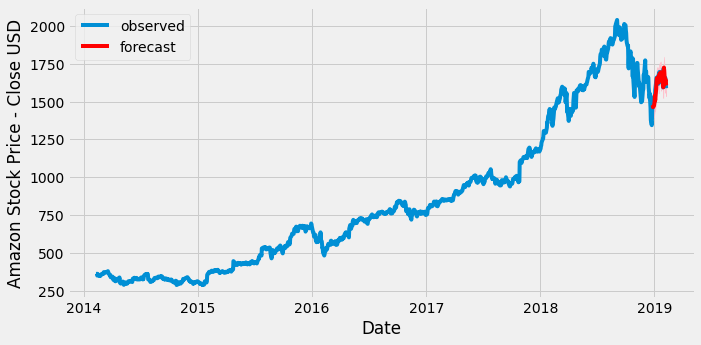

In [27]:
# plot the amazon data
plt.plot(amazon.index, amazon.close, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

Have a look at your plotted forecast. Is the mean prediction close to the observed values? Do the observed values lie between the upper and lower limits of your prediction?

### Generating dynamic forecasts

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

**Instructions**

* Use the results object to make a dynamic predictions for the latest 30 days and assign the result to dynamic_forecast.
* Assign your predictions to a new variable called mean_forecast using one of the attributes of the dynamic_forecast object.
* Extract the confidence intervals of your predictions from the dynamic_forecast object and assign them to a new variable confidence_intervals.
* Print your mean predictions.

In [28]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast.values)

[1475.34295889 1476.29021874 1468.28203734 1467.0180881  1468.03600139
 1477.95070117 1476.73849925 1479.92118575 1472.4536406  1469.69289014
 1466.77856602 1473.45717536 1476.97585499 1479.70160398 1474.8434865
 1471.51375875 1467.8824888  1471.79239483 1475.08651179 1478.98899742
 1475.95966025 1473.00078942 1469.05888895 1471.09891144 1473.78668348
 1477.73352789 1476.48087081 1474.12139042 1470.28125326 1470.87750811]


Statsmodels makes it super simple to switch between one-step ahead and dynamical predictions

### Plotting dynamic forecasts

Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The lower_limits, upper_limits and amazon DataFrames as well as your mean predictions mean_forecast that you created in the last exercise are available in your environment.

**Instructions**

* Plot the amazon data using the dates in the index of this DataFrame as the x coordinates and the values as the y coordinates.
* Plot the mean_forecast predictions similarly.
* Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of one of these DataFrames as the x coordinates.

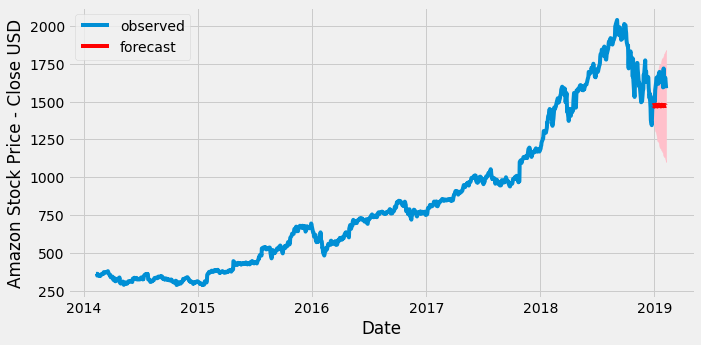

In [29]:
# plot the amazon data
plt.plot(amazon.index, amazon.close, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

It is very hard to predict stock market performance and so your predictions have a wide uncertainty. However, note that the real stock data stayed within your uncertainty limits!

## Intro to ARIMA models

### Differencing and fitting ARMA

In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

**Instructions**

* Use the .diff() method of amazon to make the time series stationary by taking the first difference. Don't forget to drop the NaN values using the .dropna() method.
* Create an ARMA(2,2) model using the SARIMAX class, passing it the stationary data.
* Fit the model.

In [30]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff,order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.151
Date:                Wed, 02 Feb 2022   AIC                          11072.302
Time:                        14:19:40   BIC                          11097.988
Sample:                             0   HQIC                         11081.955
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0772      0.004    265.829      0.000       1.069       1.085
ar.L2         -0.9954      0.003   -284.813      0.000      -1.002      -0.989
ma.L1         -1.0915      0.006   -182.598      0.0

Remember that now you have a model which you can use to predict the difference values, not the absolute value of the amazon dataset.

### Unrolling ARMA forecast

Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available.

**Instructions**

* Use the .get_forecast() method of the arma_results object and select the predicted mean of the next 10 differences.
* Use the np.cumsum() function to integrate your difference forecast.
* Add the last value of the original DataFrame to make your forecast an absolute value.

In [31]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean
arma_diff_forecast

C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1258    5.365250
1259    8.399689
1260    3.707170
1261   -4.367987
1262   -8.395231
1263   -4.695063
1264    3.299426
1265    8.227583
1266    5.578146
1267   -2.181320
dtype: float64

In [32]:

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)
arma_int_forecast

1258     5.365250
1259    13.764939
1260    17.472109
1261    13.104122
1262     4.708891
1263     0.013828
1264     3.313254
1265    11.540837
1266    17.118983
1267    14.937663
dtype: float64

In [34]:
amazon.iloc[-1,0]

1588.22

In [35]:
amazon.tail()

,close
date,
2019-02-04,1633.31
2019-02-05,1658.81
2019-02-06,1640.26
2019-02-07,1614.37
2019-02-08,1588.22


In [36]:
# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
print(arma_value_forecast)

1258    1593.585250
1259    1601.984939
1260    1605.692109
1261    1601.324122
1262    1592.928891
1263    1588.233828
1264    1591.533254
1265    1599.760837
1266    1605.338983
1267    1603.157663
dtype: float64


You have just made an ARIMA forecast the hard way. Next you'll use statsmodels to make things easier.

### Fitting an ARIMA model

In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

A subset of the stocks dataset is available in your environment as amazon and so is the SARIMAX model class.

**Instructions**

* Create an ARIMA(2,1,2) model, using the SARIMAX class, passing it the Amazon stocks data amazon.
* Fit the model.
* Make a forecast of mean values of the Amazon data for the next 10 time steps. Assign the result to arima_value_forecast.

In [37]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon.close,order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1259    1593.664262
1260    1602.046906
1261    1605.657696
1262    1601.204614
1263    1592.814921
1264    1588.210142
1265    1591.599633
1266    1599.832946
1267    1605.327749
1268    1603.052511
dtype: float64


ou just made the same forecast you made before, but this time with an ARIMA model. Your two forecasts give the same results, but the ARIMA forecast was a lot easier to code!

**Choosing ARIMA model**

You are trying to figure out which ARIMA model is the best fit for a dataset after trying different degrees of differencing and applying the Augmented Dicky-Fuller test on the differenced data. The test statistics were these:

|Order of difference|	ADF statistic|	p-value|
|---|---|--|
|0	|2.198|	 0.999|
|1	|-2.598| 0.093|
|2	|-14.448|0.000|
|3	|-17.147|0.000|

Which kind of ARIMA model should you fit to this time series data?

* ARIMA(p,2,q) because, you want to make sure our data is stationary but don't want to over difference it either. This is the right call!